-----------------------------------------------------
# 선형 모델(Linear Model)
    - p.156 (핸즈온 머신러닝)
    - https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-3-%EC%84%A0%ED%98%95-%EB%AA%A8%EB%8D%B8/
    - https://datascienceschool.net/view-notebook/731e0d2ef52c41c686ba53dcaf346f32/
-----------------------------------------------------

![Figure_Axes](img/figure_axes.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
# 음수기호 표시 안되는거 해결
rcParams["axes.unicode_minus"] = False
import scipy

w[0]: 0.393906  b: -0.031804


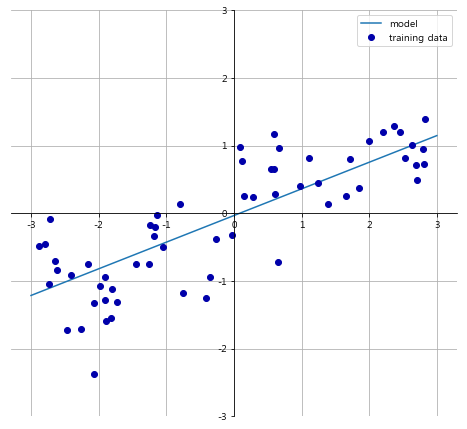

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [6]:
# 회귀 분석 예제
# 주제 : 전기 생산량과 소비량
# 귀무 가설 : 전기 생산량과 전기 소비량간의 상관관계가 없다.
# 연구 가설 : 전기 생산량과 전기 소비량간의 상관관계가 있다.

# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

# scipy : 수치해석기능을 제공하는 파이썬 패키지
# stats : 확률분포 분석을 위한 다양한 기능을 제공
from scipy import stats

result = stats.linregress(X, y)
result  # 기울기, 절편, r_vlaue, p_value, stderr(표준오차)..

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

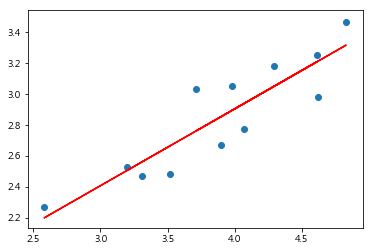

In [10]:
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
# X를 배열로 변환 (그래프 그릴때는 필요x, 나중을 위해서)
X1 = np.array(X)
type(X1)
plt.scatter(X, y)
plt.plot(X1, slope*X1+intercept, c="red")  #회귀식!

In [11]:
# 생산량이 4일 때 사용량은 얼마일까?
4 * slope + intercept  # y = 2.901994

2.901994372142104

In [13]:
# 회귀 분석 예제 2
# 주제 : 온도와 오존량의 관계
# 귀무가설 : 온도가 오존량에 영향을 미치지 않는다.
# 연구가설 : 온도가 오존량에 영향을 미친다.
# 예측 : 온도가 화씨 80도일 때 오존량 예측

df = pd.read_csv("data/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [15]:
# 회귀분석 예제 3 : 보스턴 주택 가격
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

'''
타겟 데이터
    1978 보스턴 주택 가격
    506개 타운의 주택 가격 중앙값 (단위 1,000 달러)
특징 데이터
    CRIM: 범죄율
    INDUS: 비소매상업지역 면적 비율
    NOX: 일산화질소 농도
    RM: 주택당 방 수
    LSTAT: 인구 중 하위 계층 비율
    B: 인구 중 흑인 비율
    PTRATIO: 학생/교사 비율
    ZN: 25,000 평방피트를 초과 거주지역 비율
    CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
    AGE: 1940년 이전에 건축된 주택의 비율
    RAD: 방사형 고속도로까지의 거리
    DIS: 직업센터의 거리
    TAX: 재산세율
'''

boston = load_boston()
# 선형 회귀 , 훈련용 테스트용 나누지 않음
model_boston = LinearRegression().fit(boston.data, boston.target)

In [18]:
dir(model_boston)  # 기울기 : coef_  절편: intercept
# 기울기 확인
print(model_boston.coef_)
print(boston.feature_names)  # RM  : 3.80986521e+00  -> RM(방갯수) 하나가 늘어날 때마다 주택가격이 3800달러 정도 증가한다.

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

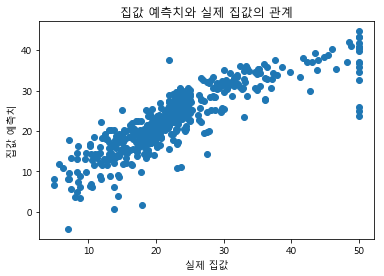

In [19]:
prediction = model_boston.predict(boston.data)
plt.scatter(boston.target, prediction)  # 실제값과 예측값
plt.xlabel("실제 집값")
plt.ylabel("집값 예측치")
plt. title("집값 예측치와 실제 집값의 관계")

C:\Users\acorn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


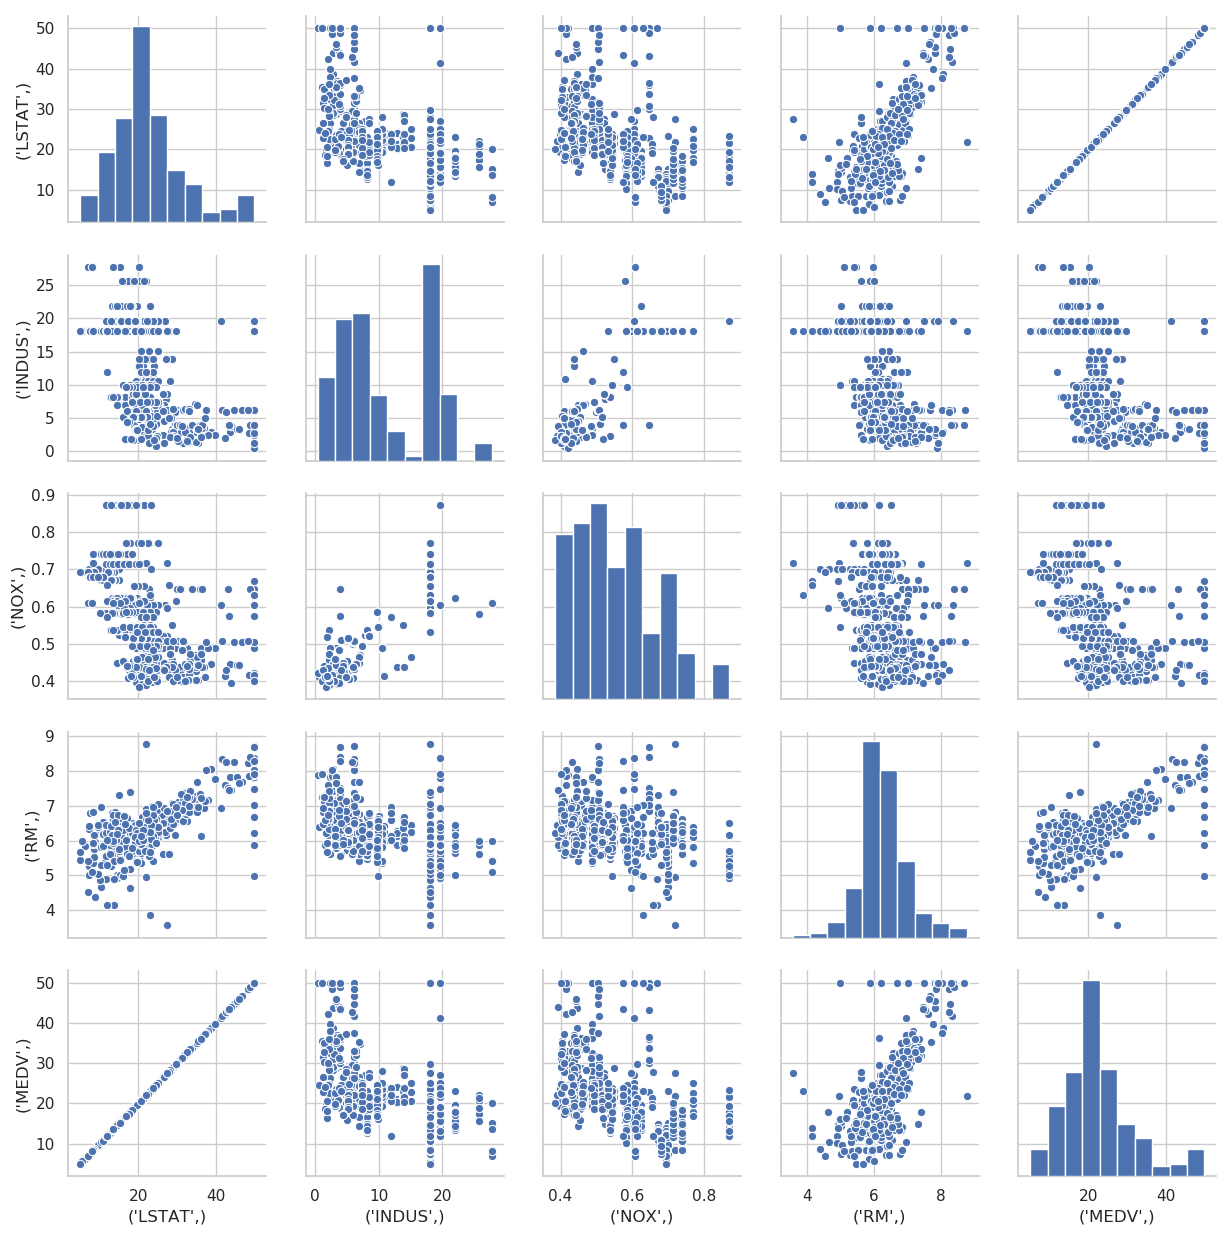

In [31]:
# 데이터 프레임으로 바꾸기 (후속 작업을 위해)
# seaborn의 pairplot 그래프 그리기
#df= pd.DataFrame(boston.data)
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PIRATIO', 'LSTAT', 'MEDV']  # target : MEDV
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df["MEDV"] = boston.target

sns.set(style="whitegrid", context="notebook")
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols], size=2.5)
sns.reset_orig()  # 모든 매개변수를 원래 설정으로 복원

In [34]:
df[cols]

,LSTAT,INDUS,NOX,RM,MEDV
0,24.0,2.31,0.538,6.575,24.0
1,21.6,7.07,0.469,6.421,21.6
2,34.7,7.07,0.469,7.185,34.7
3,33.4,2.18,0.458,6.998,33.4
4,36.2,2.18,0.458,7.147,36.2
5,28.7,2.18,0.458,6.430,28.7
6,22.9,7.87,0.524,6.012,22.9
7,27.1,7.87,0.524,6.172,27.1
8,16.5,7.87,0.524,5.631,16.5
9,18.9,7.87,0.524,6.004,18.9


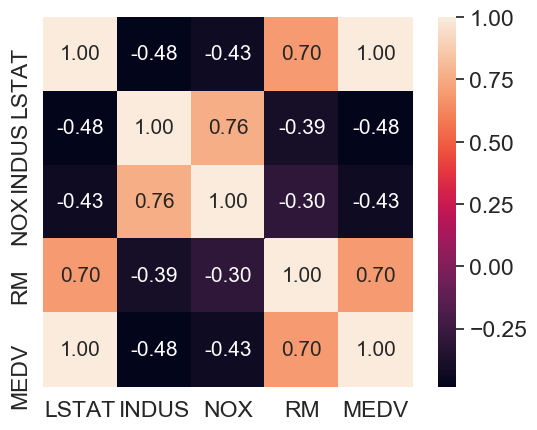

In [33]:
# 히트맵으로도 그려서 살펴보자 (seaborn의 heatmap 그래프)
sns.set(font_scale=1.5)
# 히트맵 그리기 위해 형태 바꿔주기
cm = np.corrcoef(df[cols].values.T)
heat = sns.heatmap(cm, cbar=True, square=True, annot=True, fmt=".2f", annot_kws={"size":15}, \
                  yticklabels=cols, xticklabels=cols)   # annot : 수치 출력

기울기 : 9.102
절편 : -34.671


Text(0.5, 1.0, '1978년 미국 보스턴 외곽지역[방의수-주택가격]추이\n')

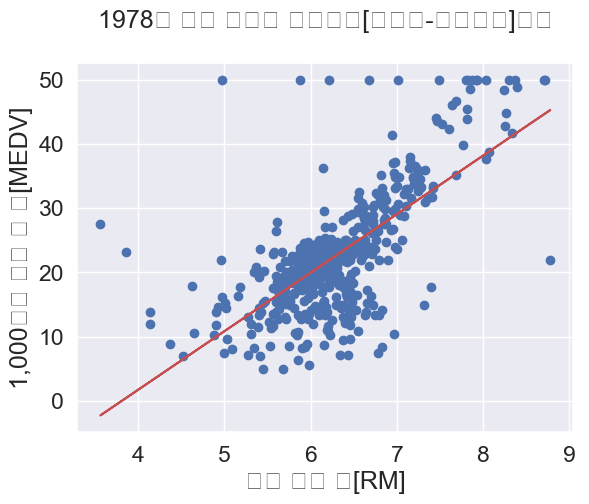

In [44]:
# 주택 가격에 대한 예측
from sklearn.linear_model import LinearRegression
from matplotlib import style

# 그래프 그리는 함수
def lin_regplot(X, y, model):
    plt.scatter(X, y, c="b")
    plt.plot(X, model.predict(X), c="r")

X = df[["RM"]].values
y = df[["MEDV"]].values

slr = LinearRegression().fit(X, y)

slope = slr.coef_[0]
intercept = slr.intercept_
print("기울기 : %.3f\n절편 : %.3f"%(slope, intercept))

lin_regplot(X, y, slr)
plt.xlabel("평균 방의 수[RM]")
plt.ylabel("1,000달러 단위 집 값[MEDV]")
plt.title("1978년 미국 보스턴 외곽지역[방의수-주택가격]추이\n")

In [45]:
5 * slope + intercept  # 10.83992413

array([10.83992413])

In [46]:
num_rooms = np.array([[5]])
house_val = slr.predict(num_rooms)
print("방이 [%d]개인 주택 가격은 약 [%.f]달러이다."%(int(num_rooms), house_val*1000))

방이 [5]개인 주택 가격은 약 [10840]달러이다.


In [61]:
# 단순 회귀
type(boston.data)
#type(boston)  # 다양한 형태의 값들이 복합적으로 들어가 있다.

X = boston.data[:, 5]
X.shape  # 1차원 배열
X1 = np.atleast_2d(X)  # (1, n)
X1.shape
X2 = np.transpose(X1)
X2.shape

lr = LinearRegression().fit(X2, boston.target)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
boston.data[5, :]

array([2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 2.8700e+01])

In [65]:
# 적합도 측정 : MSE (Mean Squared Error, 평균 제곱 오차), 이상치 같은 것들의 영향을 많이 받음    cf.)분류알고리즘에서는 confusion Matrix 을 사용한다.
            # RMSE
    
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(boston.target, lr.predict(X2))
r2 = r2_score(boston.target, lr.predict(X2))
print(r2)  # 결정계수  0.4835254

lr.score(X2, boston.target)

0.48352545599133423


0.4835254559913343

In [67]:
# 다중 회기
lr = LinearRegression().fit(boston.data, boston.target)

In [69]:
# 좀 더 정규화 시키는 모델 : 정규화(Regularization) : 릿지, 라쏘, 엘라스틱 : 거리를 따지는 방법이다!
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=600)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# random_state 에 대하여 : 'train_test_split' splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying 'random_state', you will get a different result, this is expected behavior.

In [70]:
lr = LinearRegression().fit(X_train, y_train)

In [72]:
print("훈련점수 : {: .2f}".format(lr.score(X_train, y_train)))
print("테스트점수 : {: .2f}".format(lr.score(X_test, y_test)))

훈련점수 :  0.63
테스트점수 :  0.63


In [75]:
# wave 데이터는 특성이 하나 였음

# 특성이 많은 데이터일 경우
X, y = mglearn.datasets.load_extended_boston()
X.shape  # (506, 104)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [76]:
print("훈련점수 : {: .2f}".format(lr.score(X_train, y_train)))  # 0.95 : 과적합
print("테스트점수 : {: .2f}".format(lr.score(X_test, y_test)))  # 0.61 : 적합도 낮음

훈련점수 :  0.95
테스트점수 :  0.61


### 규제가 있는 선형 모델(정규화 or 벌칙) : 과대적합을 감소시키는 좋은 방법
#### 릿지 회귀(Ridge Regression)
    - 가중치의 절대값을 가능한 한 작게 만든다. (기울기를 작게 만든다) , 특성에 대한 영향력을 최대한 적게 줄인다.
    - L2 Regularization
    
#### 라쏘 회귀(Lasso Regression)
    - 릿지 회귀의 대안으로 사용
    - L1 규제(Regularization) : 가중치 벡터의 L1 노름 사용 ( 절대값?)
    
#### ElasticNet
    - L1 + L2 규제

In [81]:
# 1. 릿지 회귀
from sklearn.linear_model import Ridge

# Ridge함수 안의 alpha : 가중치에 영향을 줄 수 있음, alpha값을 높이면 가중치가 낮아지고, 직선에 가까워진다. 모델의 분산은 줄지만 편향은 커지게 된다.
# alpha : 1.0 (기본값)
ridge = Ridge().fit(X_train, y_train)
print("훈련점수 : {: .2f}".format(ridge.score(X_train, y_train)))  # 0.89
print("테스트점수 : {: .2f}".format(ridge.score(X_test, y_test)))  # 0.75
# 훈련점수 적합도는 낮아졌지만 테스트점수의 적합도는 높아졌다. 즉, 어느 정도 규제가 되었다고 볼 수 있음. 릿지를 이용하여 복잡도를 낮춘 것.

훈련점수 :  0.89
테스트점수 :  0.75


In [82]:
# alpha : 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)  # Ridge함수 안의 alpha : 가중치에 영향을 줄 수 있음, alpha값을 높이면 가중치가 낮아진다.
print("훈련점수 : {: .2f}".format(ridge10.score(X_train, y_train)))  # 0.79
print("테스트점수 : {: .2f}".format(ridge10.score(X_test, y_test)))  # 0.64
# 특성에 미치는 영향이 낮아짐. 과적합은 없지만 훈련점수, 테스트점수 모두 낮아졌다. 복잡도(훈련)가 높아질수록 일반화는 낮아진다.

훈련점수 :  0.79
테스트점수 :  0.64


In [83]:
# alpha : 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)  # Ridge함수 안의 alpha : 가중치에 영향을 줄 수 있음, alpha값을 높이면 가중치가 낮아진다.
print("훈련점수 : {: .2f}".format(ridge01.score(X_train, y_train)))  # 0.93
print("테스트점수 : {: .2f}".format(ridge01.score(X_test, y_test)))  # 0.77

훈련점수 :  0.93
테스트점수 :  0.77


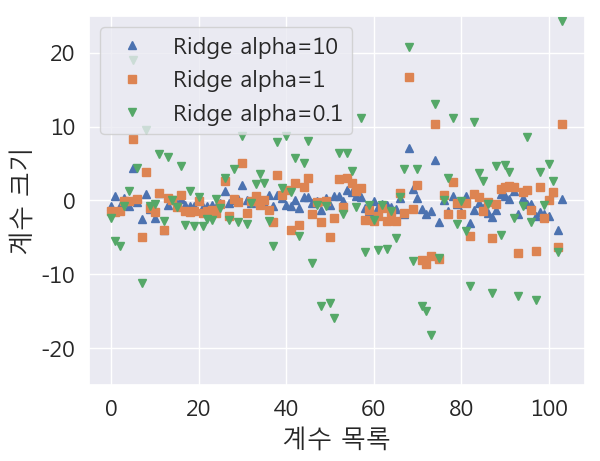

In [87]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend()
# alpha를 증가시킬수록 직선에 가까워진다. 즉, 모델의 분산은 줄지만 편향은 커진다.

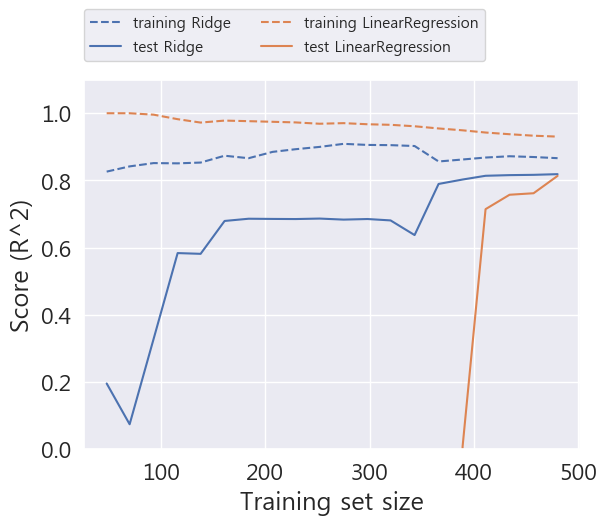

In [88]:
# alpha 값을 고정하고 훈련 데이터의 크기를 변화시킨다.
mglearn.plots.plot_ridge_n_samples()  
# alpha는 기본값으로 고정된 상태, 전체적으로 training data가 높고, 그 중에서도 training Ridge 데이터는 선형회귀보다 낮다.
# 그런데 test에선 Ridge가 선형회귀보다 높다.
# 데이터의 수가 많아지면 규제의 효과가 미미해진다. 즉, 데이터의 수가 많으면 많아질 수록 웬만한 데이터 문제는 해결이 된다는 것

In [90]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련점수 : {: .2f}".format(lasso.score(X_train, y_train)))  # 0.29
print("테스트점수 : {: .2f}".format(lasso.score(X_test, y_test)))  # 0.21
print("사용한 특성의 수:{}".format(np.sum(lasso.coef_!=0)))  # 총 104개의 특성 중, 4개만 사용

훈련점수 :  0.29
테스트점수 :  0.21
사용한 특성의 수:4


In [93]:
# alpha값 낮추는 등 조절해서 다시 보기
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)  # alpha: 0.01
print("훈련점수 : {: .2f}".format(lasso001.score(X_train, y_train)))  # 0.90
print("테스트점수 : {: .2f}".format(lasso001.score(X_test, y_test)))  # 0.77
print("사용한 특성의 수:{}".format(np.sum(lasso001.coef_!=0)))  # 33

훈련점수 :  0.90
테스트점수 :  0.77
사용한 특성의 수:33


In [97]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)  # alpha: 0.0001
print("훈련점수 : {: .2f}".format(lasso00001.score(X_train, y_train)))  # 0.95
print("테스트점수 : {: .2f}".format(lasso00001.score(X_test, y_test)))  # 0.64
print("사용한 특성의 수:{}".format(np.sum(lasso00001.coef_!=0)))  # 96

훈련점수 :  0.95
테스트점수 :  0.64
사용한 특성의 수:96


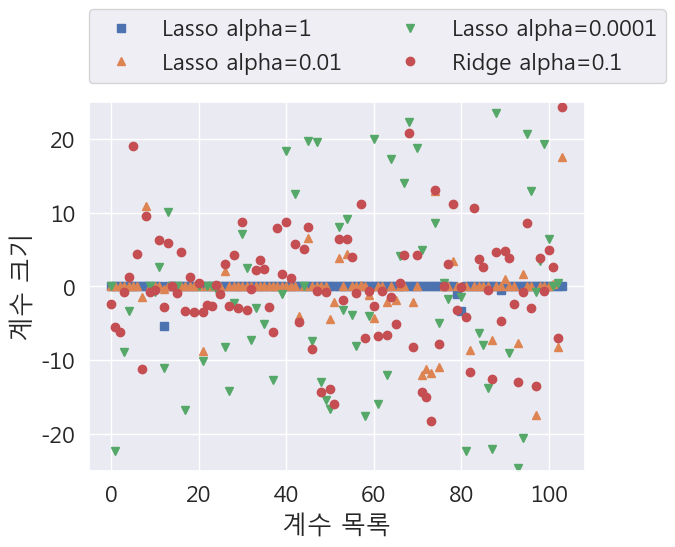

In [101]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")

# 라쏘와 릿지 비교
plt.plot(ridge01.coef_, "o", label="Ridge alpha=0.1")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

------------------------------------------------------------------
## 분류형 선형 모델
  ### 1. linear_model.LogisticRegression
      - 로지스틱 loss function
  ### 2. svm,LinearSVC
      - 교차 엔트로피loss function

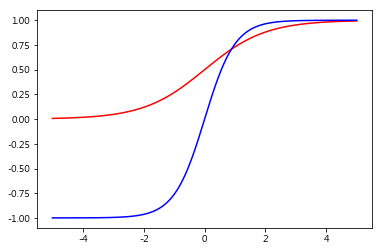

In [8]:
# sigmoid 함수 그래프 그리기
# sigmoid 공식을 실행할 함수 만들기
# def sigmoid(x):
#     a = []
#     for i in x:
#         a.append(1/(1+np.exp(-i)))
        
#     return a

# x = np.linspace(-8, 8, 100)  # -8부터 8을 100개의 구간으로 동등하게 나눈다
# sig = sigmoid(x)

# plt.plot(x, sig)

x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/(1+np.exp(-x)), 'r-')
# 탄젠트
plt.plot(x, np.tanh(x), 'b-')

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


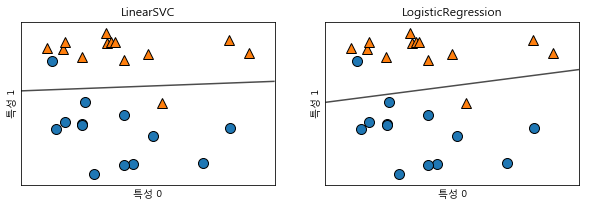

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)  # ax : plot객체
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

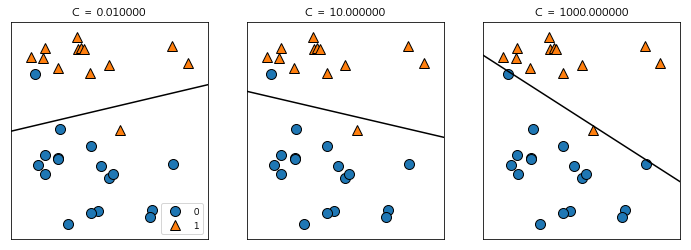

In [17]:
mglearn.plots.plot_linear_svc_regularization()

In [20]:
# C값 관련 (Regularization의 강도를 결정하는 parameter는 C)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)
# random_state : int, randomstate instance 또는 None 값을 사용합니다. 정수 값을 입력하면 숫자를 random하게 생성할때 사용되는 seed 숫자로 사용되며, None을 입력하면 np.random에서 제공하는 random number generator가 사용됩니다.
# stratify : 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정한다. 예를 들어 0,1의 클래스가 input dataset에 20:80 비율로 있었다면 훈련 데이터와 테스트 데이터 역시 각각의 클래스가 같은 비율로 있도록 지정할 수 있다. 

In [22]:
logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("훈련점수 : {: .3f}".format(logreg.score(X_train, y_train))) #0.955
print("테스트점수 : {: .3f}".format(logreg.score(X_test, y_test)))  #0.958

훈련점수 :  0.955
테스트점수 :  0.958


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
logreg100 = LogisticRegression(C=100, penalty="l1").fit(X_train, y_train)  # c값과 penalty 같이 조정 (따로 조정안해주면 penalty기본값: l2 이다.)
print("훈련점수 : {: .3f}".format(logreg100.score(X_train, y_train))) #0.972 -> penalty적용 : 0.986
print("테스트점수 : {: .3f}".format(logreg100.score(X_test, y_test)))  #0.965 -> penalty적용 : 0.979

훈련점수 :  0.986
테스트점수 :  0.979


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련점수 : {: .3f}".format(logreg001.score(X_train, y_train))) #0.934
print("테스트점수 : {: .3f}".format(logreg001.score(X_test, y_test)))  #0.930

훈련점수 :  0.934
테스트점수 :  0.930


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


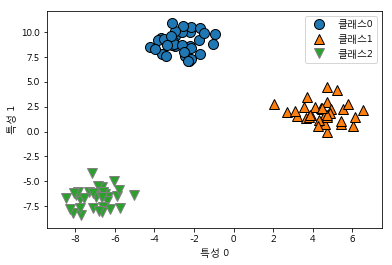

In [30]:
# 다중 클래스 분류용 선형 모델
# - 일대다 방법(one-VS-rest,OvR) : 이진분류기를 많이 만드는 거임.. p.141 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하는 전략

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)   # random_state : 임의생성
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스0", "클래스1", "클래스2"])

In [31]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기:", linear_svm.coef_.shape)  # (3, 2)
print("절편 배열의 크기:", linear_svm.intercept_.shape)  # (3,)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


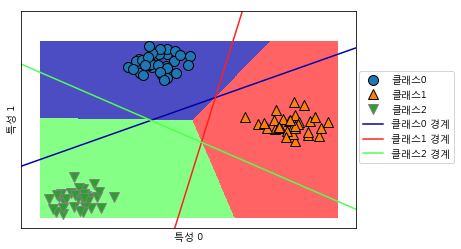

In [40]:
# 데이터 그래프에 분류선 긋기
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, eps=0.5, alpha=.7)  # fill: 평면칠하기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스0", "클래스1", "클래스2", "클래스0 경계", "클래스1 경계", "클래스2 경계"],loc=(1.01, 0.3))

---------------------------------------
## 적합도 검정

    - 정확성(Accuracy) : 데이터가 불균형할 때에는 정확성이 높아도 적합도가 높지 않을 수 있다. -> 정밀도와 재생률 같이 봐야 함
    - 정밀도(Precision)
    - 재생률(Recall)
---------------------------------------

In [41]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]  # 정확도만 보는게 아니라 어떤걸 맞추고 틀렸는지를 살펴봐야 한다.

from sklearn.metrics import confusion_matrix   # confusion_matrix : 오차행렬
confusion_matrix(y_true, y_pred)
'''
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)
       
1번째 행(0) : 0값 2개 맞춤, 1 없음, 2 없음
2번째 행(1) : 0 없음, 1 없음, 1을 2로 잘못 맞춤
3번째 행(2) : 2를 0으로 잘못,,  1 없음, 2 2개 맞춤

'''


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [43]:
# 이진 분류 예제
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred, labels=[1, 0])  # labels : positive와 negative의 순서를 바꿀 수 있다.

array([[3, 1],
       [0, 2]], dtype=int64)

In [44]:
y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

from sklearn.metrics import classification_report
# classification_report : 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1-score를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.
print(classification_report(y_true, y_pred, target_names=["class 0", "class 1"]))
# class 0 의 precision을 보면, class 0이라고 예측했는데 데이터의 75%만 실제로 class 0 이었다는 뜻
# 정밀도와 재현율은 trade-off의 관계

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

   micro avg       0.57      0.57      0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [66]:
# ROC 커브 & AUC : Receiver Operating Characteristic(ROC, 수신기 조작 특성)
# ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화한 것이다.
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [67]:
model = LogisticRegression().fit(X, y)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
y_hat = model.predict(X)
f_value = model.decision_function(X)
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])  # 3개의 데이터를 수직으로 합쳐서 dataframe의 모양으로 만듦
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.167628,1.0,1.0
1,1.861485,1.0,1.0
2,1.482220,1.0,1.0
3,1.447944,1.0,1.0
4,1.432822,1.0,1.0
5,1.035662,1.0,1.0
6,0.244729,1.0,0.0
7,-0.063016,0.0,1.0
8,-0.582239,0.0,0.0
9,-0.878385,0.0,0.0


In [69]:
# 기준값 0을 사용하여 이진 분류 결과표, 재현율, 위양성율을 계산
confusion_matrix(y, y_hat, labels=[1, 0])
'''
array([[6, 2],
       [1, 7]], dtype=int64)
'''

'\narray([[6, 2],\n       [1, 7]], dtype=int64)\n'

In [70]:
recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)  # 0.75
print("fallout =", fallout)  # 0.125

recall = 0.75
fallout = 0.125


In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

Text(0, 0.5, 'True Positive Rate(Recall)')

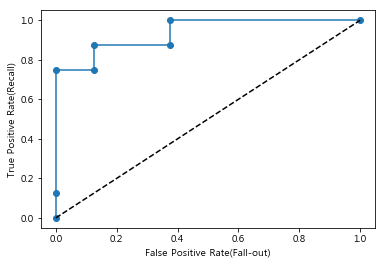

In [72]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel("False Positive Rate(Fall-out)")
plt.ylabel("True Positive Rate(Recall)")

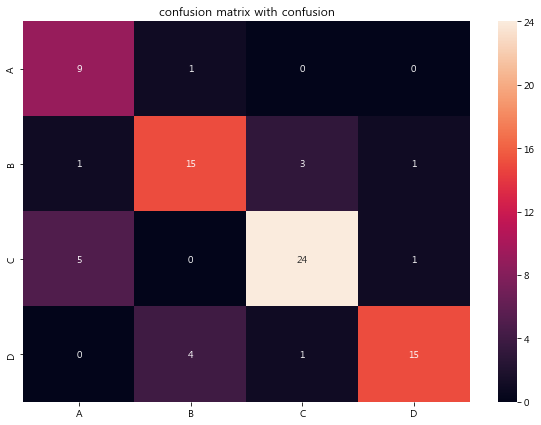

In [77]:
# 오차표를 히트맵으로 그리기
array = [[9, 1, 0, 0],   # 정답률 = 9/10
        [1, 15, 3, 1],   # 정답률 = 15/20 ...etc. 각 해당 데이터의 개수가 달라서 어느 것이 성능이 좋은지 한눈에 알 수가 없다. -> Normalization필요
        [5, 0, 24, 1],
        [0, 4, 1, 15]]

df_cm = pd.DataFrame(array, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm

plt.figure(figsize=(10, 7))
plt.title("confusion matrix with confusion")
sns.heatmap(df_cm, annot = True)

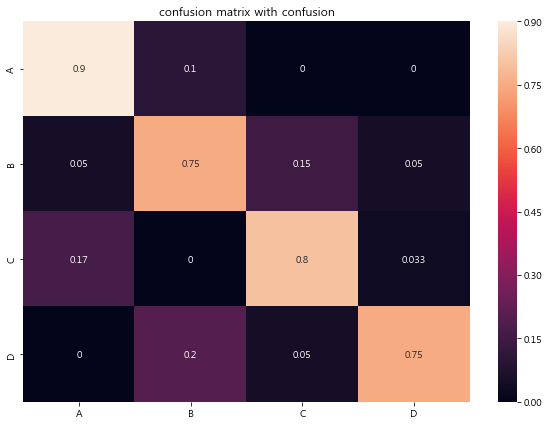

In [79]:
# Normalization
array = [[9, 1, 0, 0],   
        [1, 15, 3, 1], 
        [5, 0, 24, 1],
        [0, 4, 1, 15]]

total = np.sum(array, axis=1)
array = array / total[:, None]
array

'''
array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])
'''

df_cm = pd.DataFrame(array, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df_cm

plt.figure(figsize=(10, 7))
plt.title("confusion matrix with confusion")
sns.heatmap(df_cm, annot = True)

-------------------------------------------------
## 타이타닉 예제를 이용한 로지스틱 회귀분석
-------------------------------------------------

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 이름 등이 생사에 영향을 미치지않는다고 가정하고 빼기.. 
cols_to_keep = ["Survived", "Age", "Fare"]

# Pclass의 경우 1등급이 제일 좋은 등급이지만 컴퓨터를 숫자가 클수록 좋다고 인식하므로 바꿔줘야 한다.
# 의미없는 수치로 바꿔줄 때 dummy 사용
dummy_pclass = pd.get_dummies(df["Pclass"], prefix="pclass")  # prefix : 접두사
print(dummy_pclass.head())  # pclass가 3개로 나뉘었음

   pclass_1  pclass_2  pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1


In [4]:
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")
print(dummy_sex.head())

   Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1


In [5]:
# target : Survived
data = df[cols_to_keep].join(dummy_pclass.loc[:,'pclass_1':])
data.head()

,Survived,Age,Fare,pclass_1,pclass_2,pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [6]:
data = data.join(dummy_sex.loc[:,'Sex_female'])  # Sex_female 하나만 가져와도 성별구분이 가능하다.
data.head()

,Survived,Age,Fare,pclass_1,pclass_2,pclass_3,Sex_female
0,0,22.0,7.2500,0,0,1,0
1,1,38.0,71.2833,1,0,0,1
2,1,26.0,7.9250,0,0,1,1
3,1,35.0,53.1000,1,0,0,1
4,0,35.0,8.0500,0,0,1,0


In [7]:
# Survived를 제외한 나머지를 인덱싱 : 원인변수들
train_cols = data.columns[1:]
train_cols

Index(['Age', 'Fare', 'pclass_1', 'pclass_2', 'pclass_3', 'Sex_female'], dtype='object')

In [8]:
# 결측치 처리
# np.isnan(data[train_cols])
data[train_cols] = data[train_cols].fillna(0)

In [9]:
# statsmodels 패키지는 검정 및 추정 (test and estimation) / 회귀 분석 (regression analysis) / 시계열 분석 (time-series analysis) 등의 기능을 제공한다.
import statsmodels.api as sm
# 로지스틱 회귀 분석
model = sm.Logit(data["Survived"], data[train_cols]).fit()   # fit : 훈련
model.summary2()

# Coef(편회귀계수)  Sex_female : 2.6151 <- 여성이 남성보다 살 수 있는 확률이 높음
        # Age : -0.0159 <- 나이가 많을수록 살 수 있는 확률이 떨어짐 (음의 상관관계)

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2019-06-03 09:44 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
pclass_1      0.0781    0.2928    0.2667  0.7897  -0.4957   0.6519
pclass_2     -0.7632    0.2437   -3.1316  0.0017  -1.2408  -0.2855
pclass_3     -1.9936    0.1814  -10.9909  0.0000  -2.3491  -1.6381
Sex_female    2.6151    0.1860   14.0594  0.0000   2.2505   2.9797
=================================================================

"""

In [10]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression().fit(data[train_cols], data["Survived"])

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
data["Predict"] = model2.predict(data[train_cols])
data.head(30)

,Survived,Age,Fare,pclass_1,pclass_2,pclass_3,Sex_female,Predict
0,0,22.0,7.2500,0,0,1,0,0
1,1,38.0,71.2833,1,0,0,1,1
2,1,26.0,7.9250,0,0,1,1,1
3,1,35.0,53.1000,1,0,0,1,1
4,0,35.0,8.0500,0,0,1,0,0
5,0,0.0,8.4583,0,0,1,0,0
6,0,54.0,51.8625,1,0,0,0,0
7,0,2.0,21.0750,0,0,1,0,0
8,1,27.0,11.1333,0,0,1,1,1
9,1,14.0,30.0708,0,1,0,1,1


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data["Survived"], data["Predict"], labels= [1, 0])  # labels= [1, 0] : 1이 positive, 0이 negative

array([[242, 100],
       [ 92, 457]], dtype=int64)

In [19]:
print("정확도 : ", (242 + 457) / (242 + 100 +92+ 457))  # 정확도 : 0.7845
print("정확도 : ", model2.score(data[train_cols], data["Survived"]))  # 0.7845

정확도 :  0.7845117845117845
정확도 :  0.7845117845117845


In [20]:
from sklearn.metrics import classification_report
print(classification_report(data["Survived"], data["Predict"], target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.82      0.83      0.83       549
     class 1       0.72      0.71      0.72       342

   micro avg       0.78      0.78      0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True Positive Rate')

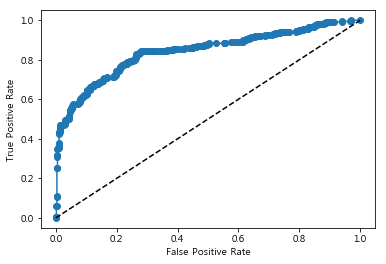

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(data["Survived"], model2.decision_function(data[train_cols]))  # predict맞춘비율,틀린 비율? 판별함수 값을 출력

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

--------------------------------------------------
# Cancer데이터를 이용한 로지스틱 회귀분석
--------------------------------------------------

In [34]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.target_names)
print(len(breast_cancer.data))
print(breast_cancer.feature_names)

['malignant' 'benign']
569
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [37]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data.head()
# 정답
sy = pd.Series(breast_cancer.target, dtype="category")
data["class"] = sy
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [38]:
from sklearn.model_selection import train_test_split

X = data.loc[:, 'mean radius' : 'worst fractal dimension']
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(len(X_train), ',', len(X_test), ",", len(y_train), ',', len(y_test))

# 0.05 이상/이하인 것들만 골랐을때??? 

426 , 143 , 426 , 143


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# statsmodels(검정 및 추정 / 회귀분석 / 시계열 분석) 패키지를 사용할 때는 다음처럼 api 서브패키지를 임포트하여 사용한다.
import statsmodels.api as sm

log_reg = LogisticRegression().fit(X_train, y_train)
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()   # 최소제곱법을 함수로 공식화시킨 것
print(model.summary())

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Mon, 03 Jun 2019   Prob (F-statistic):          6.05e-153
Time:                        11:10:32   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     239.8
Date:                Mon, 03 Jun 2019   Prob (F-statistic):          6.37e-137
Time:                        11:43:46   Log-Likelihood:                -69.240
No. Observations:                 569   AIC:                             150.5
Df Residuals:                     563   BIC:                             176.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9459      0.145  

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 16.0, 'Predict label')

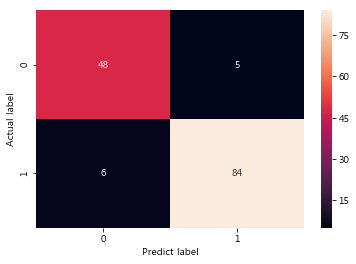

In [48]:
# p value < 0.05 
X = data[["mean compactness", "smoothness error", "concavity error", "worst radius", "worst area"]]
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

log_reg = LogisticRegression().fit(X_train, y_train)
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()   # 최소제곱법을 함수로 공식화시킨 것
print(model.summary())

y_pred = log_reg.predict(X_test)
y_pred

print("정확도 : ", metrics.accuracy_score(y_test, y_pred))  # 0.92307
cnf = metrics.confusion_matrix(y_test, y_pred)
'''
[[48  5]
 [ 6 84]]
'''

sns.heatmap(pd.DataFrame(cnf), annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predict label")

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     84.55
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           3.39e-66
Time:                        11:49:26   Log-Likelihood:                -234.52
No. Observations:                 569   AIC:                             481.0
Df Residuals:                     563   BIC:                             507.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 16.0, 'Predict label')

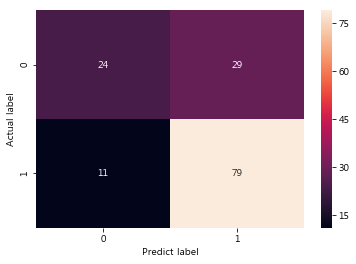

In [49]:
# p value 가 1에 가까운 변수
X = data[["mean texture", "mean smoothness", "mean symmetry", "mean fractal dimension", "texture error"]]  # 5개만 뽑아보기
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

log_reg = LogisticRegression().fit(X_train, y_train)
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()   # 최소제곱법을 함수로 공식화시킨 것
print(model.summary())

y_pred = log_reg.predict(X_test)
y_pred

print("정확도 : ", metrics.accuracy_score(y_test, y_pred))  #  0.72027
cnf = metrics.confusion_matrix(y_test, y_pred)
'''
[[48  5]
 [ 6 84]]
'''

sns.heatmap(pd.DataFrame(cnf), annot=True)
plt.ylabel("Actual label")
plt.xlabel("Predict label")